In [1]:
# VISION CLARITY 

# HW1 
### data exploration & visualization 

In [2]:
# import necessary libraries 
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd 


In [3]:
#as of now 
#set the path to the datset folder 

dataset_path = r'C:\Users\Shree\Documents\VisionClarity-Mitigating-Object-Hallucination-in-MLLM-Models\Shree\Images'

In [4]:
# Check if the path exists
if not os.path.exists(dataset_path):
    print(f"Error: The dataset path '{dataset_path}' does not exist.")
else:
    # Get a list of all folders in the dataset directory
    folders_list = os.listdir(dataset_path)

In [5]:

folders_list

['color',
 'counting',
 'existence',
 'OCR',
 'orientation',
 'position',
 'shape',
 'size']

In [6]:
#To store the count of images in each folder 
image_counts={}

#iterate through each folder and count the images 
for folder in folders_list:
    folder_path=os.path.join(dataset_path,folder)
    if os.path.exists(folder_path):
        #count the no.of images in the folder 
        image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))] #to match to the different file  types 
        image_counts[folder] = len(image_files)
    else:
        image_counts[folder] = 0  # If folder does not exist,count=0

In [7]:
# Display the counts of images in each folder
for folder, count in image_counts.items():
    print(f"Number of images in '{folder}' folder : {count}")

Number of images in 'color' folder : 72
Number of images in 'counting' folder : 82
Number of images in 'existence' folder : 102
Number of images in 'OCR' folder : 68
Number of images in 'orientation' folder : 94
Number of images in 'position' folder : 52
Number of images in 'shape' folder : 74
Number of images in 'size' folder : 106


In [8]:
#to display the size,dimensions,file_type and file_name of each images in the folders 

image_info={}
for folder in folders_list:
    folder_path = os.path.join(dataset_path, folder)
    
    if os.path.exists(folder_path):
        # Initialize variables for file size and image count
        total_size = 0
        image_files = []
        
        # Count the number of image files and calculate their sizes
        for img_name in os.listdir(folder_path):
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                img_path = os.path.join(folder_path, img_name)
                
                # Get file size
                total_size += os.path.getsize(img_path)
                
                # Store image details
                with Image.open(img_path) as img:
                    image_files.append({
                        'name': img_name,
                        'size': os.path.getsize(img_path),
                        'type': img.format,
                        'dimensions': img.size
                    })
        
        # Store information for the current folder
        image_info[folder] = {
            'total_images': len(image_files),
            'total_size_bytes': total_size,
            'image_details': image_files
        }
    else:
        image_info[folder] = {
            'total_images': 0,
            'total_size_bytes': 0,
            'image_details': []
        }  # If folder does not exist

# Display the results
for folder, info in image_info.items():
    print(f"\nFolder_Name: '{folder}'")
    print(f"  Number of images: {info['total_images']}")
    print(f"  Total size (bytes): {info['total_size_bytes']}\n")
    
    # Display details of each image
    for detail in info['image_details']:
        print(f"    - {detail['name']}: {detail['size']} bytes, Type: {detail['type']}, Dimensions: {detail['dimensions']}")



Folder_Name: 'color'
  Number of images: 72
  Total size (bytes): 157734416

    - color_0.png: 1975748 bytes, Type: PNG, Dimensions: (1024, 1024)
    - color_1.png: 2429903 bytes, Type: PNG, Dimensions: (1024, 1024)
    - color_10.png: 1591817 bytes, Type: PNG, Dimensions: (1024, 1024)
    - color_11.png: 2426366 bytes, Type: PNG, Dimensions: (1024, 1024)
    - color_12.png: 2468688 bytes, Type: PNG, Dimensions: (1024, 1024)
    - color_13.png: 1939528 bytes, Type: PNG, Dimensions: (1024, 1024)
    - color_14.png: 2865387 bytes, Type: PNG, Dimensions: (1024, 1024)
    - color_15.png: 1937006 bytes, Type: PNG, Dimensions: (1024, 1024)
    - color_16.png: 2644965 bytes, Type: PNG, Dimensions: (1024, 1024)
    - color_17.png: 2240694 bytes, Type: PNG, Dimensions: (1024, 1024)
    - color_18.png: 2468501 bytes, Type: PNG, Dimensions: (1024, 1024)
    - color_19.png: 2388096 bytes, Type: PNG, Dimensions: (1024, 1024)
    - color_2.png: 2358114 bytes, Type: PNG, Dimensions: (1024, 1024)
  

In [9]:
# to display the images ,need to store the image paths from thh folders 

# Initialize a list to store image paths
image_paths = []

# Iterate through each folder to collect image paths
for folder in folders_list:
    folder_path = os.path.join(dataset_path, folder) 
    
    if os.path.exists(folder_path):
        # Get image files in the folder
        image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
        image_paths.extend(image_files)  # Add all image paths to the list

# Create a DataFrame from the image paths
image_df = pd.DataFrame(image_paths, columns=['image_path'])

In [10]:
# display the images
print(image_df.head(3))

                                          image_path
0  C:\Users\Shree\Documents\VisionClarity-Mitigat...
1  C:\Users\Shree\Documents\VisionClarity-Mitigat...
2  C:\Users\Shree\Documents\VisionClarity-Mitigat...


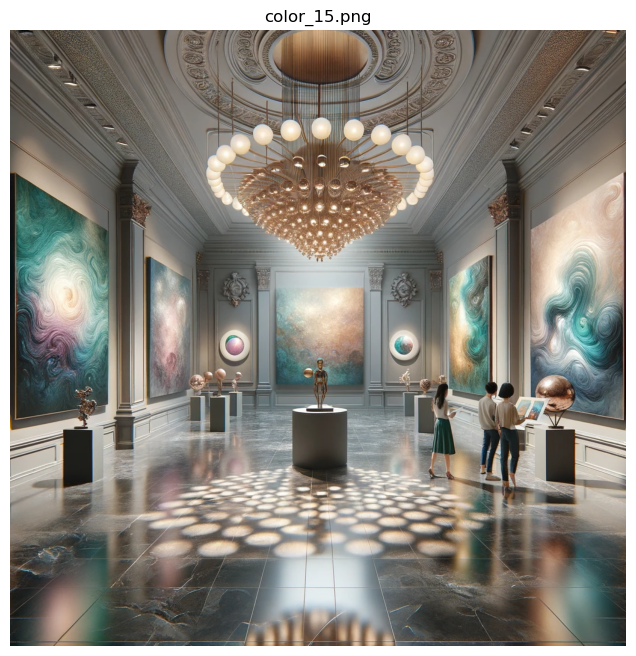

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define the image path
image_path = r"C:\Users\Shree\Documents\VisionClarity-Mitigating-Object-Hallucination-in-MLLM-Models\Shree\Images\color\color_15.png"

# Open the image
img = Image.open(image_path)

# Display the image
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.title(os.path.basename(image_path))  # Display the image filename as the title
plt.show()


# HW2
###  option 3 :Pre-trained models  

In [12]:
# Load Pretrained ResNet Model for Feature Extraction
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [13]:
# Load a Pretrained ResNet Model
model = models.resnet50(pretrained=True)  # Use ResNet50
model.eval()  #set the model to evaluation mode

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [14]:
# Load a tokenizer and model for text generation (e.g., GPT-2)
tokenizer = AutoTokenizer.from_pretrained("gpt2")
text_model = AutoModelForCausalLM.from_pretrained("gpt2")

In [15]:
# Preprocessing Function for Images
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [16]:

# Function to load and preprocess the image
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')  # Convert to RGB
    image = preprocess(image).unsqueeze(0)  # Add batch dimension
    return image

In [17]:
# Function to extract features
def extract_features(image_tensor):
    with torch.no_grad():  # Disable gradient calculation
        features = model(image_tensor)  # Pass the image through the model
    return features

In [18]:
# Load and preprocess the image
image_path = r"C:\Users\Shree\Documents\VisionClarity-Mitigating-Object-Hallucination-in-MLLM-Models\Shree\Images\color\color_15.png"
image_tensor = load_image(image_path)

# Extract features
features = extract_features(image_tensor)

# Print out the extracted features to verify
print("Extracted Features:", features)

Extracted Features: tensor([[-5.8443e+00, -3.8063e-01, -1.9138e+00, -3.0037e+00, -8.9865e-01,
          1.9738e+00,  9.3008e-01, -2.3549e+00, -3.6869e+00, -3.8587e+00,
         -2.2153e+00, -2.1309e+00, -7.1723e-01, -1.4421e+00, -5.8376e-01,
         -2.7405e+00, -3.7426e+00, -1.1397e+00, -3.8296e+00, -9.7361e-01,
         -2.5434e+00, -6.6371e+00, -5.1841e+00, -4.3163e+00, -2.6576e+00,
         -5.4580e+00, -6.3222e+00, -5.3303e+00, -3.8748e+00, -3.2923e+00,
         -4.5643e+00, -4.3672e+00, -5.2649e+00, -1.8301e+00, -1.1828e+00,
         -4.8104e+00, -7.1933e-01, -4.9067e+00, -3.1765e+00, -2.1402e+00,
         -4.6230e+00, -2.5498e+00, -3.4723e+00, -2.8333e+00, -5.1633e+00,
         -1.3917e+00, -3.5996e+00, -3.7395e+00, -3.3086e+00, -2.7480e+00,
         -2.9744e+00,  2.8836e+00, -5.0951e+00, -4.4394e+00, -3.5825e+00,
         -1.6800e+00, -1.6529e+00, -5.3693e+00, -4.0613e+00, -2.9189e+00,
         -1.8784e+00, -2.8432e+00, -3.2204e+00, -1.7120e+00, -3.6381e+00,
         -2.5881e+

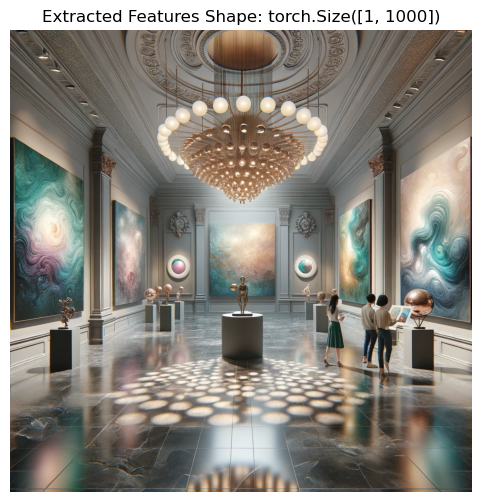

In [19]:
#Display the image along with its features
plt.figure(figsize=(8, 6))
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.title("Extracted Features Shape: " + str(features.shape))
plt.show()

In [20]:
import os
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
from transformers import BlipProcessor, BlipForConditionalGeneration

In [21]:

# Define the transformation for the input image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match the model's expected input size
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])


In [22]:
#Load a pre-trained ResNet model
resnet_model = models.resnet50(pretrained=True)
resnet_model.eval()  # Set the model to evaluation mode

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [23]:
# Load the BLIP model and processor for image captioning
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

In [24]:
#Define functions for feature extraction and description generation
def extract_image_features(image_path):
    """Extract image features using ResNet (optional)."""
    img = Image.open(image_path).convert('RGB')
    img_tensor = transform(img).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        features = resnet_model(img_tensor)  # Extract features
    return features

def generate_description(image_path):
    """Generate a description for the image using the BLIP model."""
    # Load and process the image
    raw_image = Image.open(image_path).convert('RGB')
    # Preprocess the image
    pixel_values = processor(raw_image, return_tensors="pt").pixel_values

    # Generate description
    output = blip_model.generate(pixel_values)
    description = processor.decode(output[0], skip_special_tokens=True)
    return description

Generated Description: a large room with a large painting on the wall


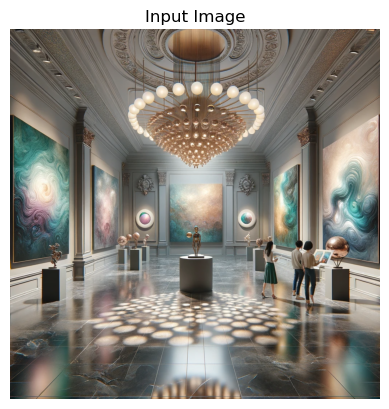

In [25]:
image_path = r"C:\Users\Shree\Documents\VisionClarity-Mitigating-Object-Hallucination-in-MLLM-Models\Shree\Images\color\color_15.png"  

# Optionally extract features using ResNet
image_features = extract_image_features(image_path)

# Generate description using the BLIP model
description = generate_description(image_path)

# Display the results
print("Generated Description:", description)

# Display the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title("Input Image")
plt.show()


- The image does not have an accurate description, highlighting the issue of object hallucinations. As we continue to develop the model, we need to fine-tune it to enhance the image descriptions and evaluate it against other models to ensure improvements are effectively achieve